<h1>Practical Tasks<h1>

<h2>Import modules<h2>

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import train_test_split

<h2>Supervised learning<h2>

<h3>Task 1<h3>

In [213]:
from sklearn.datasets import load_boston
boston = load_boston()

In [214]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [218]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

Text(0, 0.5, 'Feature name')

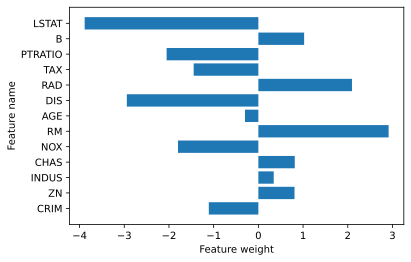

In [219]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Feature weight')
plt.ylabel('Feature name')

In [220]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test, y_pred)
r2_lr

0.6761000049033605

<h3>Task 2<h3>

In [221]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
rf.fit(X_train, y_train.values[:, 0])


RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [222]:
y_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred)
r2_rf

0.87472606157312

In [227]:
lr_str = 'The Linear Regression model describes more proportion of the variance in the target than random forest regressor'
rf_str = 'The Random Forest regressor describes more proportion of the variance in the target than linear regression model'
print(lr_str if r2_lr > r2_rf else rf_str)

The Random Forest regressor describes more proportion of the variance in the target than linear regression model


<h3>Task 3<h3>

In [228]:
importance = rf.feature_importances_
importance.sum()

1.0

In [229]:
columns_names = X_test.columns
largest_val_ind = np.argpartition(importance, -2)[-2:]
print('The names of the two most important features:')
for ind in largest_val_ind:
    print(f"{columns_names[ind]} (importance = {importance[ind]:.3f})")

The names of the two most important features:
RM (importance = 0.403)
LSTAT (importance = 0.416)


<h3>Task 4<h3>

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("archive/creditcard.csv")
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [231]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [233]:
X = df.drop('Class', axis=1)
y = df['Class']
X.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
print(f"y_train row number = {y_train.shape[0]}\nX_train row number = {X_train.shape[0]}")
y_test.value_counts(normalize=True)

y_train row number = 199364
X_train row number = 199364


0    0.998268
1    0.001732
Name: Class, dtype: float64

In [235]:
parameters = [{
        'n_estimators': [10, 15], 
        'max_features': np.arange(3,5), 
        'max_depth': np.arange(4, 7)
    }]

clf = GridSearchCV(
    estimator = RandomForestClassifier(random_state=100), 
    param_grid=parameters,
    scoring='roc_auc',
    cv=3)

In [236]:
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [237]:
clf = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15, random_state=100)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15,
                       random_state=100)

In [238]:
from sklearn.metrics import roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

<h2>Additional tasks<h2>

<h3>Task 1<h3>

In [257]:
from sklearn.datasets import load_wine
data = load_wine()

<h3>Task 2<h3>

In [258]:
print(f"type of wine dataset: {type(data)}")
data_keys = data.keys()
data_keys

type of wine dataset: <class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

<h3>Task 3<h3>

In [259]:
for line in data.DESCR.split('\n'):
    print(line)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

<h3>Task 4<h3>

In [260]:
print(f"name of classes: {data['target_names']}")

name of classes: ['class_0' 'class_1' 'class_2']


<h3>Task 5<h3>

In [261]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


<h3>Task 6<h3>

In [262]:
print(f"feature values number: {X.shape[0]}\nfeatures number: {X.shape[1]}")

feature values number: 178
features number: 13


In [263]:
print(f"The dataframe contain NaN values: {X.isnull().values.any()}")

The dataframe contain NaN values: False


<h3>Task 7<h3>

In [264]:
X['target'] = data.target
X.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2


<h3>Task 8<h3>

In [265]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<h3>Task 9<h3>

In [266]:
high_corr = X_corr.loc[(X_corr['target'].abs() > 0.5) & (X_corr['target'] != 1.0)].index.values
high_corr = high_corr.tolist()
nl = '\n'
print(f"Most important features:{nl}{nl.join(high_corr)}")

Most important features:
alcalinity_of_ash
total_phenols
flavanoids
hue
od280/od315_of_diluted_wines
proline


<h3>Task 10<h3>

In [267]:
X.drop('target', axis=1, inplace=True)
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [268]:
common = '_2'
for name in high_corr:
    X.insert(loc=X.columns.get_loc(name) + 1, column=name+common, value=np.square(X[name].values))
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,alcalinity_of_ash_2,magnesium,total_phenols,total_phenols_2,flavanoids,flavanoids_2,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,hue_2,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proline,proline_2
0,14.23,1.71,2.43,15.6,243.36,127.0,2.80,7.8400,3.06,9.3636,0.28,2.29,5.64,1.04,1.0816,3.92,15.3664,1065.0,1134225.0
1,13.20,1.78,2.14,11.2,125.44,100.0,2.65,7.0225,2.76,7.6176,0.26,1.28,4.38,1.05,1.1025,3.40,11.5600,1050.0,1102500.0
2,13.16,2.36,2.67,18.6,345.96,101.0,2.80,7.8400,3.24,10.4976,0.30,2.81,5.68,1.03,1.0609,3.17,10.0489,1185.0,1404225.0
3,14.37,1.95,2.50,16.8,282.24,113.0,3.85,14.8225,3.49,12.1801,0.24,2.18,7.80,0.86,0.7396,3.45,11.9025,1480.0,2190400.0
4,13.24,2.59,2.87,21.0,441.00,118.0,2.80,7.8400,2.69,7.2361,0.39,1.82,4.32,1.04,1.0816,2.93,8.5849,735.0,540225.0
5,14.20,1.76,2.45,15.2,231.04,112.0,3.27,10.6929,3.39,11.4921,0.34,1.97,6.75,1.05,1.1025,2.85,8.1225,1450.0,2102500.0
6,14.39,1.87,2.45,14.6,213.16,96.0,2.50,6.2500,2.52,6.3504,0.30,1.98,5.25,1.02,1.0404,3.58,12.8164,1290.0,1664100.0
7,14.06,2.15,2.61,17.6,309.76,121.0,2.60,6.7600,2.51,6.3001,0.31,1.25,5.05,1.06,1.1236,3.58,12.8164,1295.0,1677025.0
8,14.83,1.64,2.17,14.0,196.00,97.0,2.80,7.8400,2.98,8.8804,0.29,1.98,5.20,1.08,1.1664,2.85,8.1225,1045.0,1092025.0
9,13.86,1.35,2.27,16.0,256.00,98.0,2.98,8.8804,3.15,9.9225,0.22,1.85,7.22,1.01,1.0201,3.55,12.6025,1045.0,1092025.0


In [269]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,alcalinity_of_ash_2,magnesium,total_phenols,total_phenols_2,flavanoids,flavanoids_2,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,hue_2,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proline,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,391.142865,99.741573,2.295112,5.657030,2.029270,5.110049,0.361854,1.590899,5.058090,0.957449,0.968661,2.611685,7.322155,746.893258,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,133.671775,14.282484,0.625851,2.936294,0.998859,4.211441,0.124453,0.572359,2.318286,0.228572,0.443798,0.709990,3.584316,314.907474,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,112.360000,70.000000,0.980000,0.960400,0.340000,0.115600,0.130000,0.410000,1.280000,0.480000,0.230400,1.270000,1.612900,278.000000,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,295.840000,88.000000,1.742500,3.036325,1.205000,1.452100,0.270000,1.250000,3.220000,0.782500,0.612325,1.937500,3.754075,500.500000,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,380.250000,98.000000,2.355000,5.546050,2.135000,4.558250,0.340000,1.555000,4.690000,0.965000,0.931250,2.780000,7.728400,673.500000,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,462.250000,107.000000,2.800000,7.840000,2.875000,8.265700,0.437500,1.950000,6.200000,1.120000,1.254400,3.170000,10.048900,985.000000,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,900.000000,162.000000,3.880000,15.054400,5.080000,25.806400,0.660000,3.580000,13.000000,1.710000,2.924100,4.000000,16.000000,1680.000000,2.822400e+06
